# <center>Linear Regression – Class Assessment

### Step 1: Importing Libraries and Understanding Data

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Read the dataset
os.chdir('D:/Imarticus/Exam_Assesment_section/Assesment/Logistic Regression using Python')
df=pd.read_csv('D:/Imarticus/Exam_Assesment_section/Assesment/Logistic Regression using Python/xAPI-Edu-Data.csv')
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [3]:
# Looking at the 1st five rows
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
# Looking at the last five rows
df.tail()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


#### Let's check the summary of data

In [5]:
# Let's look at some statistical information about our dataframe
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
# Let's look at statistical summary of categorical variables
df.describe(include='object')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


In [7]:
# What kind of values stored in the columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

### Step 2 : Visualising Data 

In [8]:
# Check out categorical features
categorical_col = df.select_dtypes(include=['object']).columns
categorical_col

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

##### Label encoding

In [9]:
df_c=df[['GradeID','Class']]

In [10]:
# Label encoding Class Variables
for c in df_c:
    lbl=LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c]=lbl.transform(list(df[c].values))

In [11]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,1,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,2
1,M,KW,KuwaIT,lowerlevel,1,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,2
2,M,KW,KuwaIT,lowerlevel,1,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,1
3,M,KW,KuwaIT,lowerlevel,1,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,1
4,M,KW,KuwaIT,lowerlevel,1,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,2


C:\Users\sasai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sasai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sasai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sasai\anacond

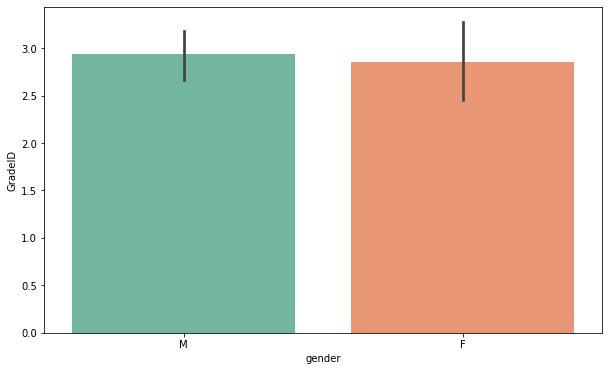

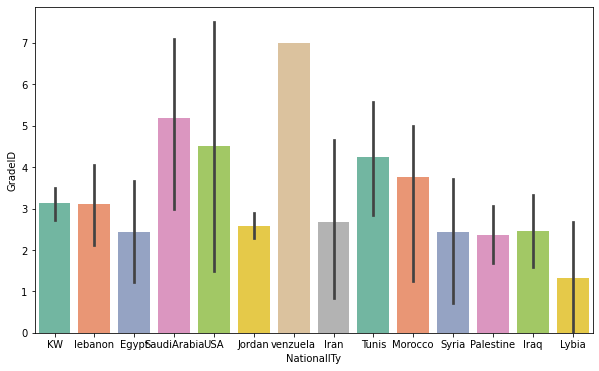

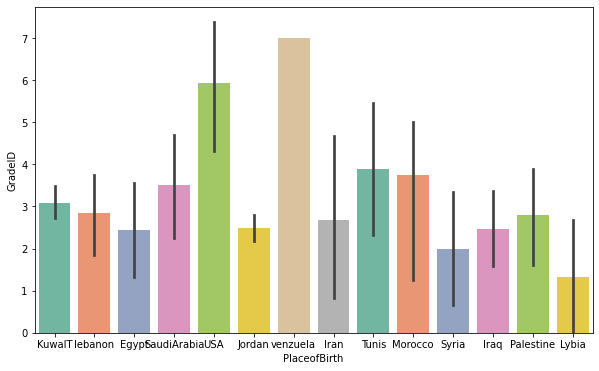

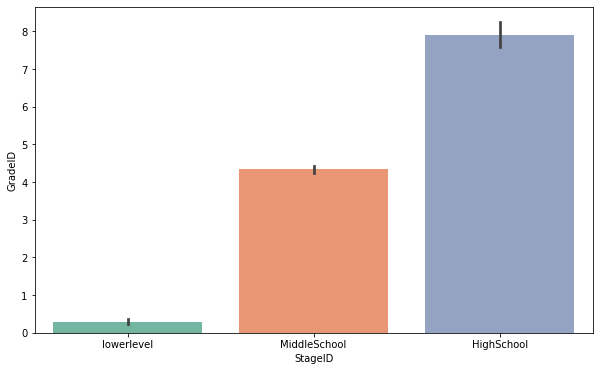

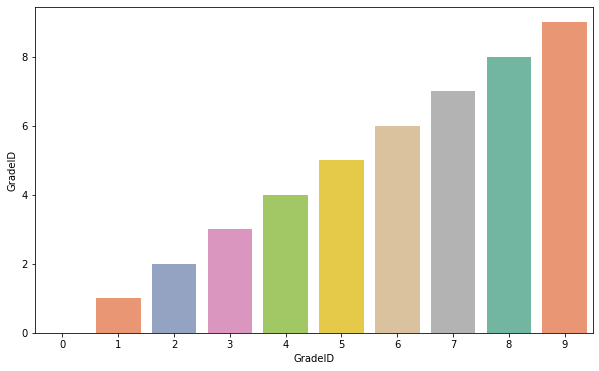

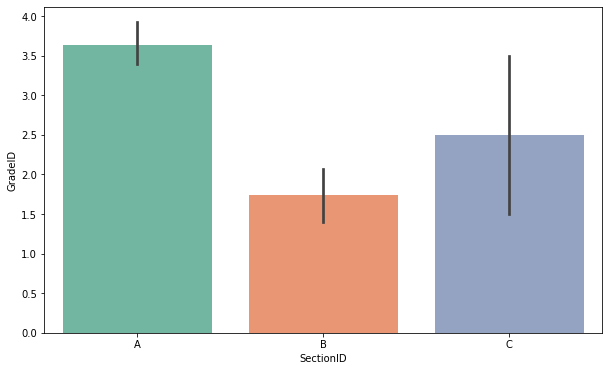

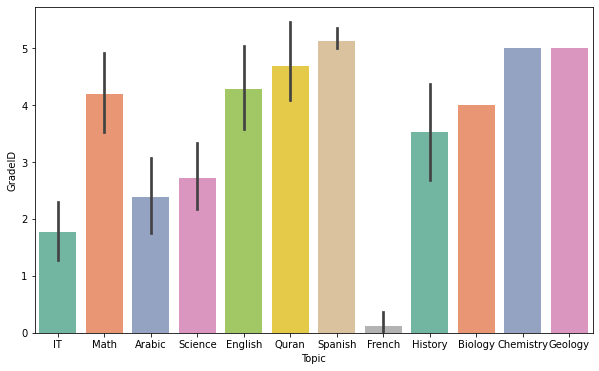

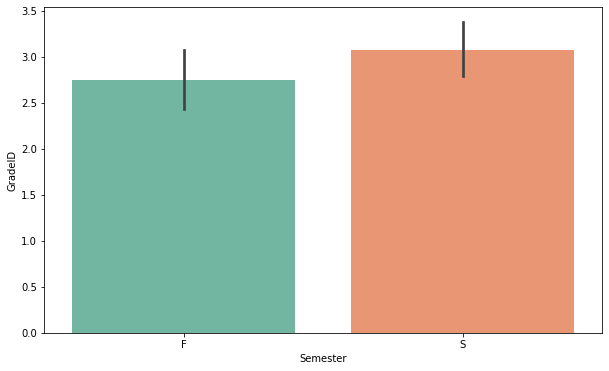

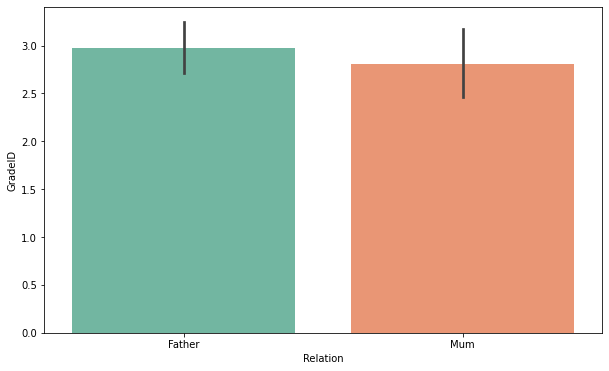

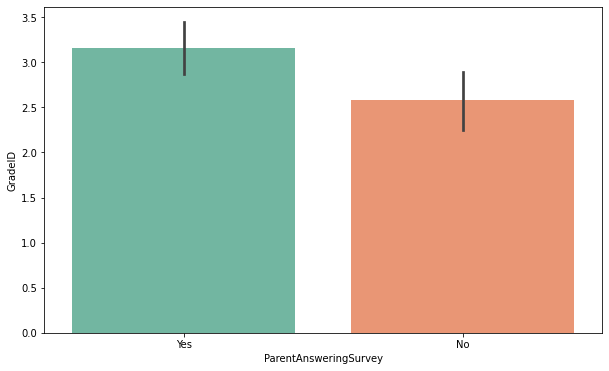

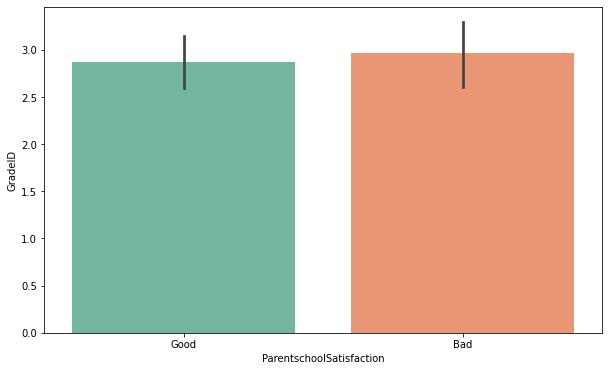

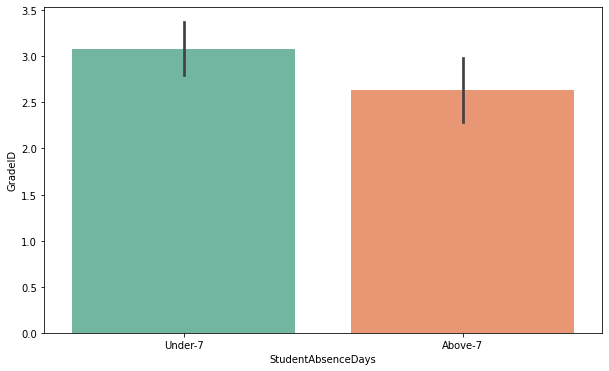

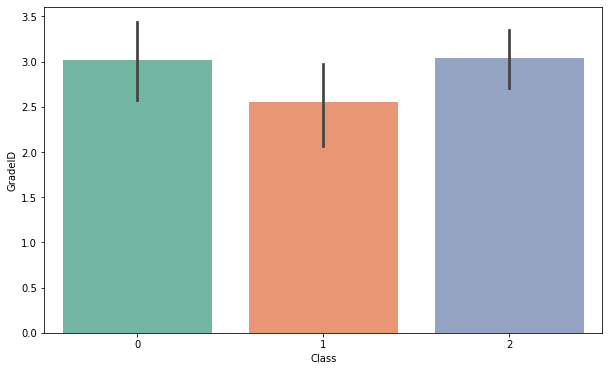

In [12]:
# This loop will help us to print all the graphs in one go with  categorical variable for the grade of the students .
for feature in categorical_col:
    plt.figure(figsize=(10,6))
    sns.barplot(feature,'GradeID', data=df, palette='Set2')

<h2> Question 4 </h2>

From the above result, what are the factors that leads to get low grades of the students?

#### Observations on the basis of Grade

1. gender: Male grade are more as compared to female
2. NationalITy: venzuela student grade are better than other nationality students.
3. PlaceofBirth: The people from venzuela has good grade still but there is slight dfference can be seen betwwen nationality and place of birth ,where if student place of birth is USA then there grade is good as compared other after venzuela.
4. StageID: Grade are exponentially increasing from lower to middle to high school.
5. Topic:It's all about intrest and native language . we can clearly see the venzuela students has more intrest on their native language and in results had good grades.                                                                                         6. Semester: Students with good grade clears the semester 
7. Relation: Parents relation defines that father good realtion with students get good grades to the students as compared to mother.
8. StudentAbsenceDays:The students who absent under-7 has some good grades.
9. Class: As per grade class is define where M & H class are considered to be almost same

(array([142.,   0.,   0.,   0.,   0., 127.,   0.,   0.,   0., 211.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

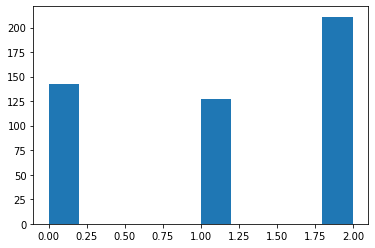

In [13]:
# Visualizing Target variable
plt.hist(df['Class'])

In [14]:
pd.crosstab(df.Class,df.Topic,normalize='columns')

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
0,0.322034,0.533333,0.416667,0.377778,0.307692,0.25,0.210526,0.157895,0.285714,0.363636,0.313725,0.20
1,0.288136,0.133333,0.333333,0.222222,0.246154,0.00,0.157895,0.400000,0.333333,0.272727,0.196078,0.32
2,0.389831,0.333333,0.250000,0.400000,0.446154,0.75,0.631579,0.442105,0.380952,0.363636,0.490196,0.48


In [15]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [16]:
imp_features = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class']

<h2>Question 2</h2>

Look at some categorical features in relation to each other, to see what insights could be possibly read?

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


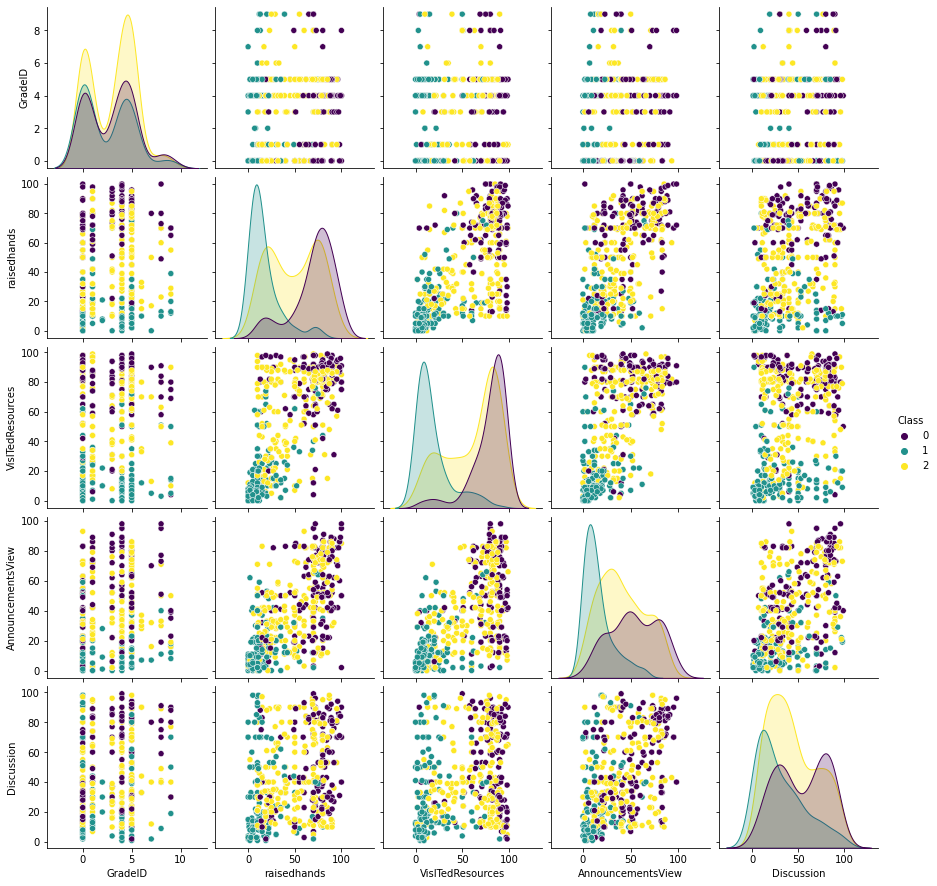

In [17]:
sns.pairplot(df[imp_features],hue='Class',palette='viridis', size=2.5)

<h2>Question 1</h2>

Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

<AxesSubplot:xlabel='count', ylabel='gender'>

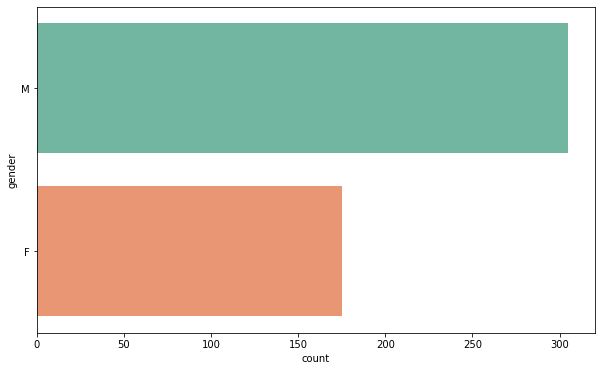

In [18]:
#df['gender'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.gender, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='NationalITy'>

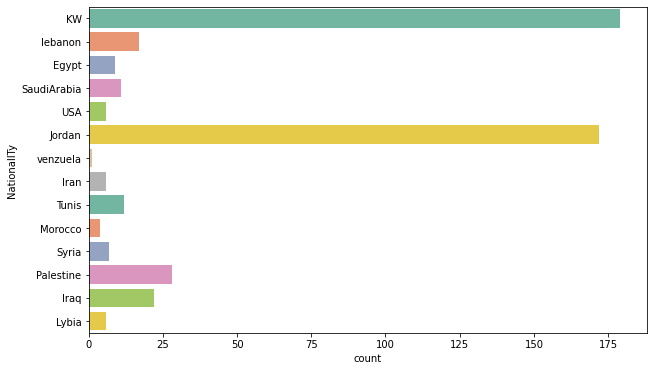

In [19]:
#df['NationalITy'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.NationalITy, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='PlaceofBirth'>

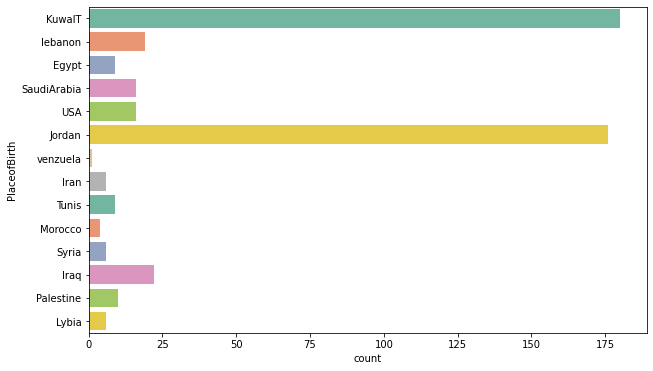

In [20]:
#df['PlaceofBirth'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.PlaceofBirth, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='StageID'>

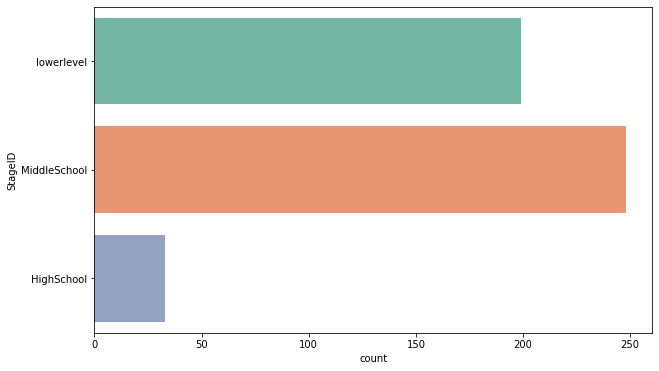

In [21]:
#df['StageID'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.StageID, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='GradeID'>

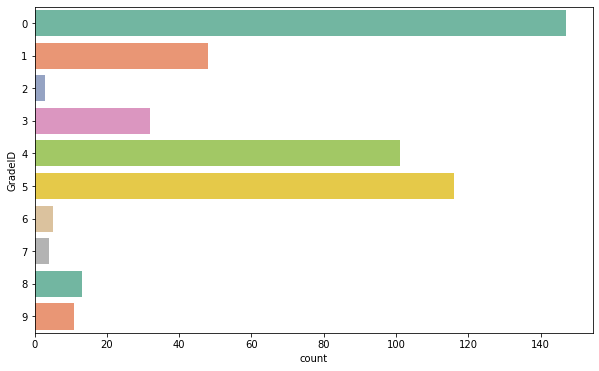

In [22]:
#df['GradeID'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.GradeID, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='SectionID'>

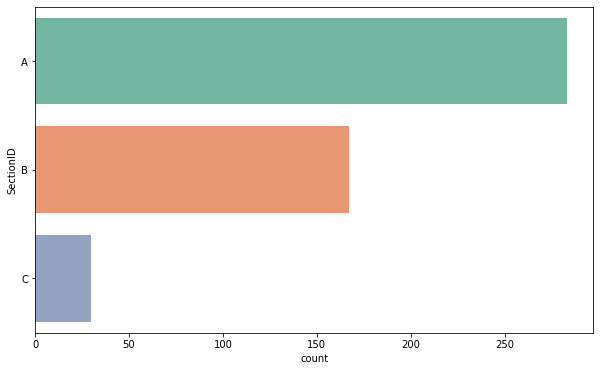

In [23]:
#df['SectionID'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.SectionID, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='Topic'>

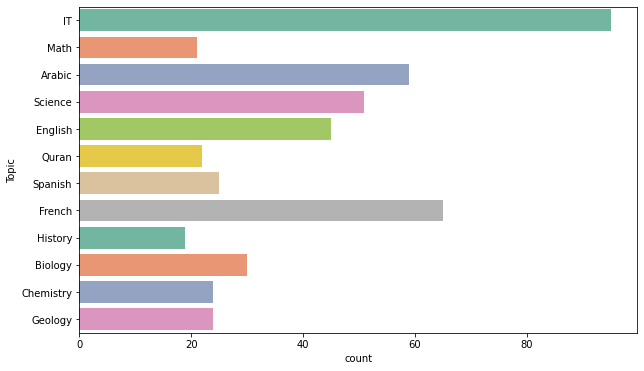

In [24]:
#df['Topic'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.Topic, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='Semester'>

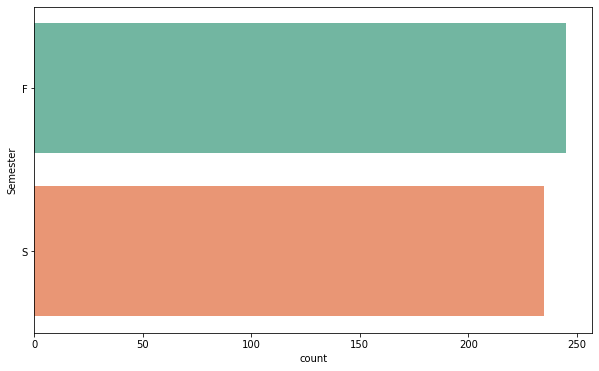

In [25]:
#df['Semester'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.Semester, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='Relation'>

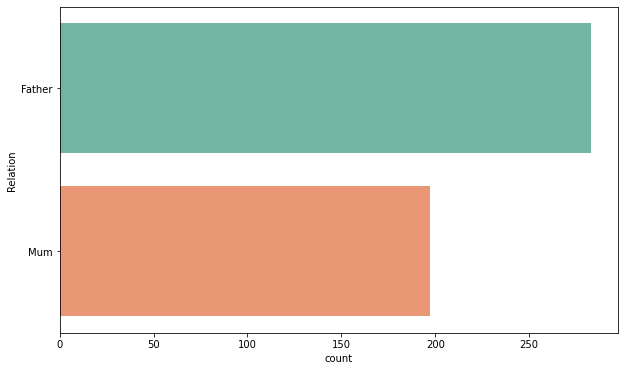

In [26]:
#df['Relation'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.Relation, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='Relation'>

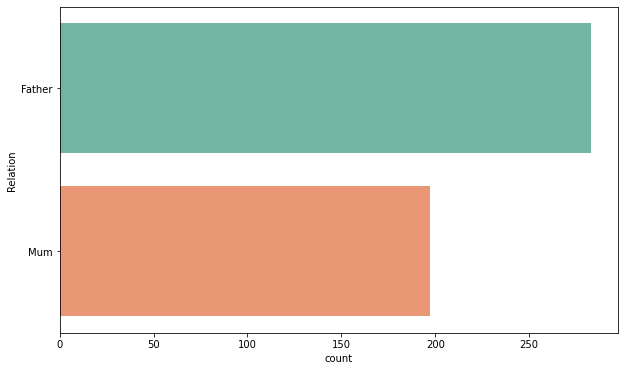

In [27]:
#df['Relation'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.Relation, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='VisITedResources'>

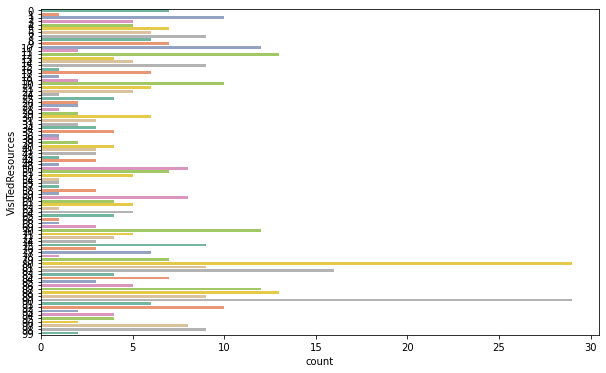

In [28]:
#df['VisITedResources'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.VisITedResources, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='AnnouncementsView'>

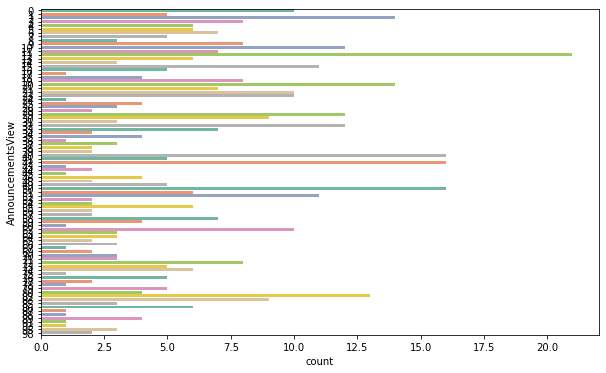

In [29]:
#df['AnnouncementsView'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.AnnouncementsView, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='Discussion'>

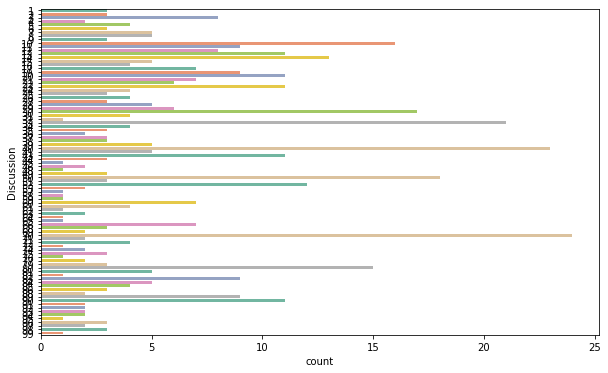

In [30]:
#df['Discussion'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.Discussion, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='ParentAnsweringSurvey'>

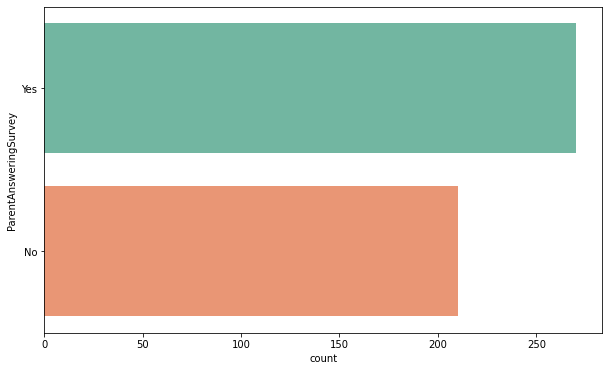

In [31]:
#df['ParentAnsweringSurvey'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.ParentAnsweringSurvey, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='ParentschoolSatisfaction'>

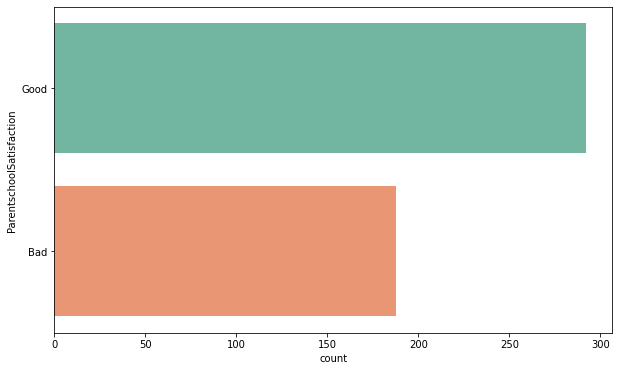

In [32]:
#df['ParentschoolSatisfaction'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.ParentschoolSatisfaction, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='StudentAbsenceDays'>

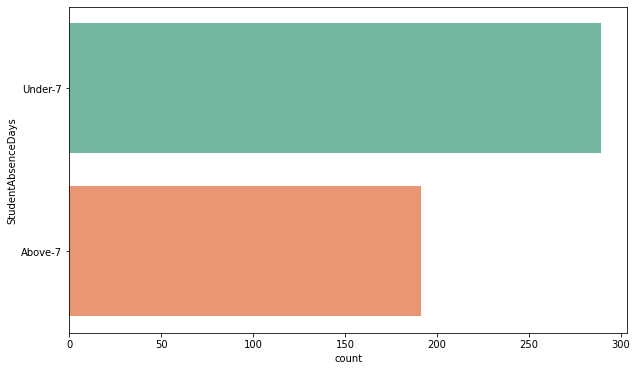

In [33]:
#df['StudentAbsenceDays'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.StudentAbsenceDays, palette='Set2')

<AxesSubplot:xlabel='count', ylabel='Class'>

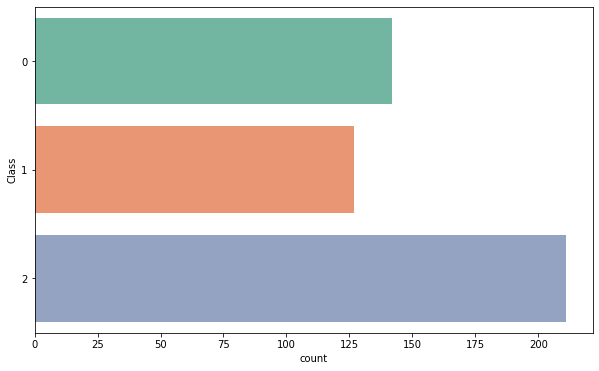

In [34]:
#df['Class'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df.Class, palette='Set2')

In [35]:
# Check correlation
df.corr()

,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
GradeID,1.000000,0.182621,0.078262,0.183033,0.168462,0.013483
raisedhands,0.182621,1.000000,0.691572,0.643918,0.339386,-0.231016
VisITedResources,0.078262,0.691572,1.000000,0.594500,0.243292,-0.161748
AnnouncementsView,0.183033,0.643918,0.594500,1.000000,0.417290,-0.143996
Discussion,0.168462,0.339386,0.243292,0.417290,1.000000,-0.121971
Class,0.013483,-0.231016,-0.161748,-0.143996,-0.121971,1.000000


In [37]:
# Separation of numeric variables
num = df.select_dtypes(include=np.number)
num

,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
0,1,15,16,2,20,2
1,1,20,20,3,25,2
2,1,10,7,0,30,1
3,1,30,25,5,35,1
4,1,40,50,12,50,2
...,...,...,...,...,...,...
475,5,5,4,5,8,1
476,5,50,77,14,28,2
477,5,55,74,25,29,2
478,5,30,17,14,57,1


<AxesSubplot:>

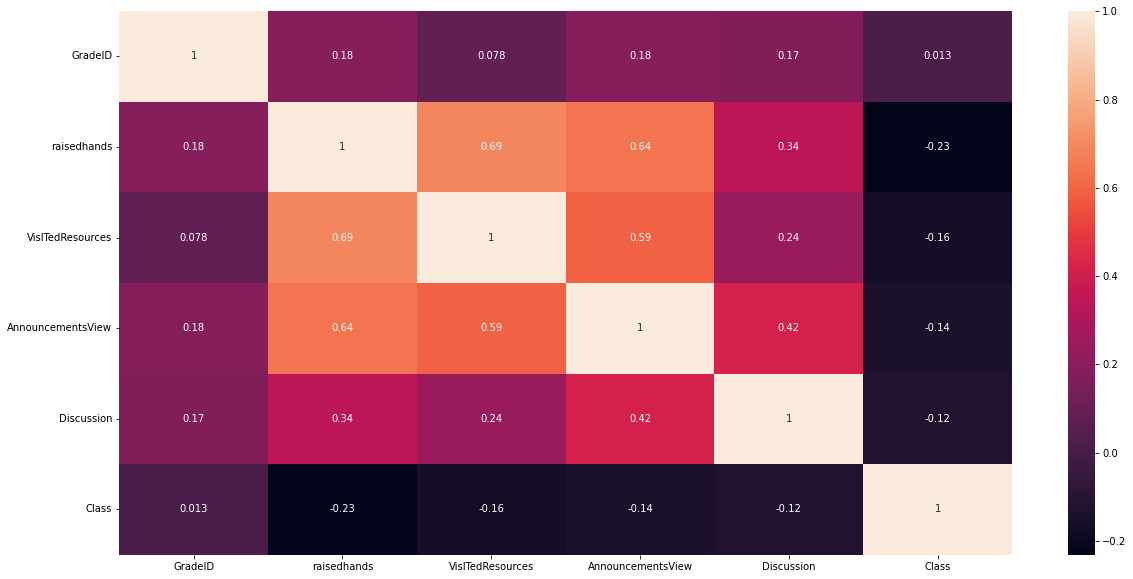

In [40]:
# Plotting Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(num.corr(), annot=True)

#### Missing Data Treatment

In [39]:
# Checking for null values
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [41]:
# Now let us check how many missing values are there in the columns and their percentage

# Total missing values vaues in every column.
total_missing = df.isnull().sum()

# Calculate percentage
percentage = total_missing / df.isnull().count()

# Combine total and percentage values
NAs = pd.concat([total_missing,percentage], axis=1, keys=('Total','Percentage'))

# Getting columns where there are missing values
NAs[NAs.Total>0].sort_values(by='Total', ascending=False)

,Total,Percentage


<h2>Question 3</h2>

Visualize categorical variables with numerical variables and give conclusions?

In [42]:
# Separation of categoric variables
cat = df.select_dtypes(include='object')
cat

,gender,NationalITy,PlaceofBirth,StageID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,Yes,Good,Under-7
1,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,Yes,Good,Under-7
2,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,No,Bad,Above-7
3,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,No,Bad,Above-7
4,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,No,Bad,Above-7
...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,A,Chemistry,S,Father,No,Bad,Above-7
476,F,Jordan,Jordan,MiddleSchool,A,Geology,F,Father,No,Bad,Under-7
477,F,Jordan,Jordan,MiddleSchool,A,Geology,S,Father,No,Bad,Under-7
478,F,Jordan,Jordan,MiddleSchool,A,History,F,Father,No,Bad,Above-7


<AxesSubplot:xlabel='Class', ylabel='raisedhands'>

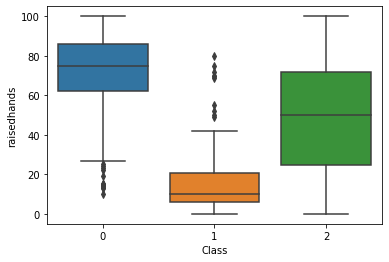

In [43]:
sns.boxplot(x=df.Class,y=df.raisedhands)

<AxesSubplot:xlabel='GradeID', ylabel='raisedhands'>

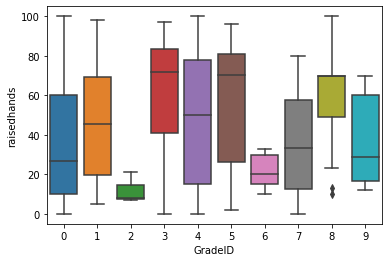

In [44]:
sns.boxplot(x=df.GradeID,y=df.raisedhands)

<AxesSubplot:xlabel='GradeID', ylabel='Discussion'>

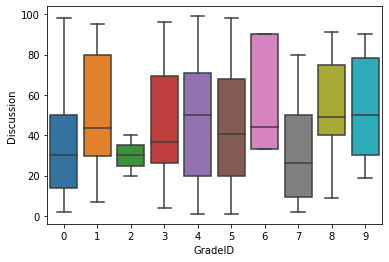

In [45]:
sns.boxplot(x=df.GradeID,y=df.Discussion)

<AxesSubplot:xlabel='GradeID', ylabel='AnnouncementsView'>

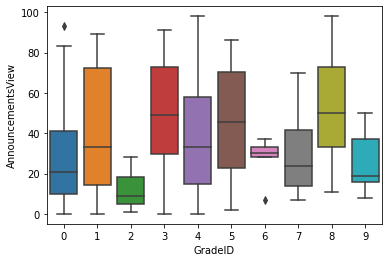

In [46]:
sns.boxplot(x=df.GradeID,y=df.AnnouncementsView)

<AxesSubplot:xlabel='GradeID', ylabel='VisITedResources'>

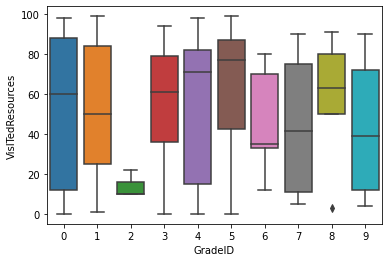

In [47]:
sns.boxplot(x=df.GradeID,y=df.VisITedResources)

<AxesSubplot:xlabel='GradeID', ylabel='raisedhands'>

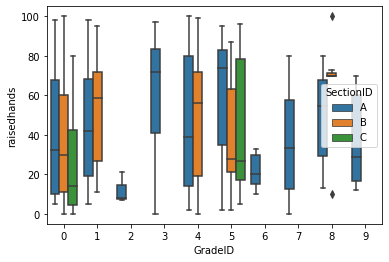

In [48]:
sns.boxplot(x=df.GradeID,y=df.raisedhands,hue=df.SectionID)

<AxesSubplot:xlabel='GradeID', ylabel='raisedhands'>

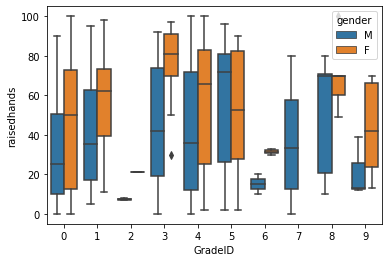

In [49]:
sns.boxplot(x=df.GradeID,y=df.raisedhands,hue=df.gender)

<AxesSubplot:xlabel='GradeID', ylabel='raisedhands'>

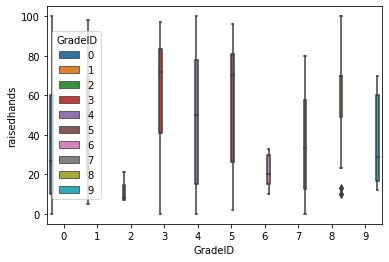

In [50]:
sns.boxplot(x=df.GradeID,y=df.raisedhands,hue=df.GradeID)

In [51]:
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [52]:
# Creating dummy variables
cat_dummy=pd.get_dummies(cat)
cat_dummy

,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
476,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
477,1,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
478,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [53]:
# Combine numeric and dummy variables
merge_data=pd.concat([num,cat_dummy],axis=1)

###  Step 3 : Splitting the data in Training and Test Set

In [54]:
y=merge_data['Class']

In [55]:
x=merge_data.drop(['Class'],axis=1)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=100)

In [57]:
# Check the shape of 
x_train.shape, x_test.shape ,y_train.shape,y_test.shape

((336, 63), (144, 63), (336,), (144,))

<h2> Question 5 </h2>

Build classification model and present it's classification report?

### Step 4 : Performing Logistic Regression

In [58]:
lr=LogisticRegression(multi_class='multinomial', solver='lbfgs',penalty='none')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\sasai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
confusion_matrix(y_test,y_pred)

array([[26,  0,  7],
       [ 1, 36,  5],
       [ 9,  8, 52]], dtype=int64)

### Step 5 : Model Performance Metrics

In [60]:
f1 = f1_score(y_test, y_pred ,average=None)

In [61]:
accuracy = accuracy_score(y_test, y_pred)

In [62]:
precision = precision_score(y_test, y_pred ,average=None)

In [63]:
recall = recall_score(y_test, y_pred,average=None)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)

In [65]:
print("F1 score is:",f1)

F1 score is: [0.75362319 0.8372093  0.78195489]


In [66]:
print("Accuracy is:",accuracy)

Accuracy is: 0.7916666666666666


In [67]:
print("Precision score is:",precision)

Precision score is: [0.72222222 0.81818182 0.8125    ]


In [68]:
print("Recall score is:",recall)

Recall score is: [0.78787879 0.85714286 0.75362319]


In [ ]:
print("Roc_auc Score is: ",roc_auc)

In [69]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        33
           1       0.82      0.86      0.84        42
           2       0.81      0.75      0.78        69

    accuracy                           0.79       144
   macro avg       0.78      0.80      0.79       144
weighted avg       0.79      0.79      0.79       144



### Step 6 : Performing Logit Model

In [ ]:
logit_model = sm.Logit(list(y_train),x_train)

In [ ]:
result = logit_model.fit()

In [ ]:
result.summary2()

### standardize and scale continuous variables

### Step 7 : Performing SGD

In [71]:
x_temp = x_train
x_std = StandardScaler().fit_transform(x_temp)
x = x_std
y = y_train

x_test_temp = x_test
x_test_std = StandardScaler().fit_transform(x_test_temp)
x_te = x_test_std
y_te = y_test

clf = SGDRegressor(shuffle=False, learning_rate='invscaling', max_iter=2500)
clf.fit(x,y)

y_pred = clf.predict(x_te)

print('Class'+str(clf.coef_))
print("Y intercept:"+str(clf.intercept_))

h1n1_vaccine:[ 0.01607323 -0.16351118  0.10306097  0.02430336 -0.09543177 -0.01522005
  0.01522005  0.02725549  0.03145225 -0.0277704  -0.00494895  0.01519389
  0.00900807  0.02128102  0.06261598 -0.06093718  0.01619861 -0.00949435
 -0.11581332 -0.02010466  0.         -0.06336072  0.03145225 -0.0277704
  0.03769149 -0.02951725  0.00900807  0.02128102 -0.02742357 -0.04756126
  0.01619861 -0.04539418  0.12965712 -0.01054523  0.          0.01570874
  0.08304478 -0.09132488 -0.01756633 -0.01185543  0.06204942  0.00212409
 -0.09194283 -0.0557847  -0.02722395  0.03895812  0.07778933  0.04033049
  0.04018817 -0.05822225 -0.02629136  0.03857452 -0.05256045  0.01192796
 -0.01192796  0.12749937 -0.12749937  0.00026876 -0.00026876  0.02212916
 -0.02212916  0.07251518 -0.07251518]
Y intercept:[1.0910634]


In [72]:
# Checking Mean Squared Error
Mean_Sq_Error = mean_squared_error(y_te, y_pred)
Mean_Sq_Error

0.6540825255582905